# Exploratory Data Analysis (EDA)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
import xgboost as xgb
import warnings
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error
from sklearn.base import clone
warnings.filterwarnings('ignore')

In [2]:
def load_data():
    data_dir = '../input/'

    train = pd.read_csv(data_dir + 'train.csv', index_col="id")
    test = pd.read_csv(data_dir + 'test.csv', index_col="id")
    return train, test

In [3]:
train, test = load_data()
train

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [5]:
train.shape

(750000, 8)

In [7]:
print(train.describe())

                 Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  
mean       95.483995      40.036253      88.282781  
std         9.449845       0.779875      62.395349  
min        67.000000      37.100000       1.000000  
25%        88.000000      39.600000      34.000000  
50%        95.000000      40.300000      77.000000  
75%    

In [52]:
train['Sex_encoded'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex_encoded'] = test['Sex'].map({'female': 0, 'Male': 1})

train.drop('Sex', axis=1, inplace=True)
test.drop('Sex', axis=1, inplace=True)

In [27]:
train.isnull().sum()

Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
Sex_encoded    0
dtype: int64

In [75]:
test.to_csv('output/test_clean.csv', index=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Age          750000 non-null  int64   
 1   Height       750000 non-null  float64 
 2   Weight       750000 non-null  float64 
 3   Duration     750000 non-null  float64 
 4   Heart_Rate   750000 non-null  float64 
 5   Body_Temp    750000 non-null  float64 
 6   Calories     750000 non-null  float64 
 7   Sex_encoded  750000 non-null  category
dtypes: category(1), float64(6), int64(1)
memory usage: 46.5 MB


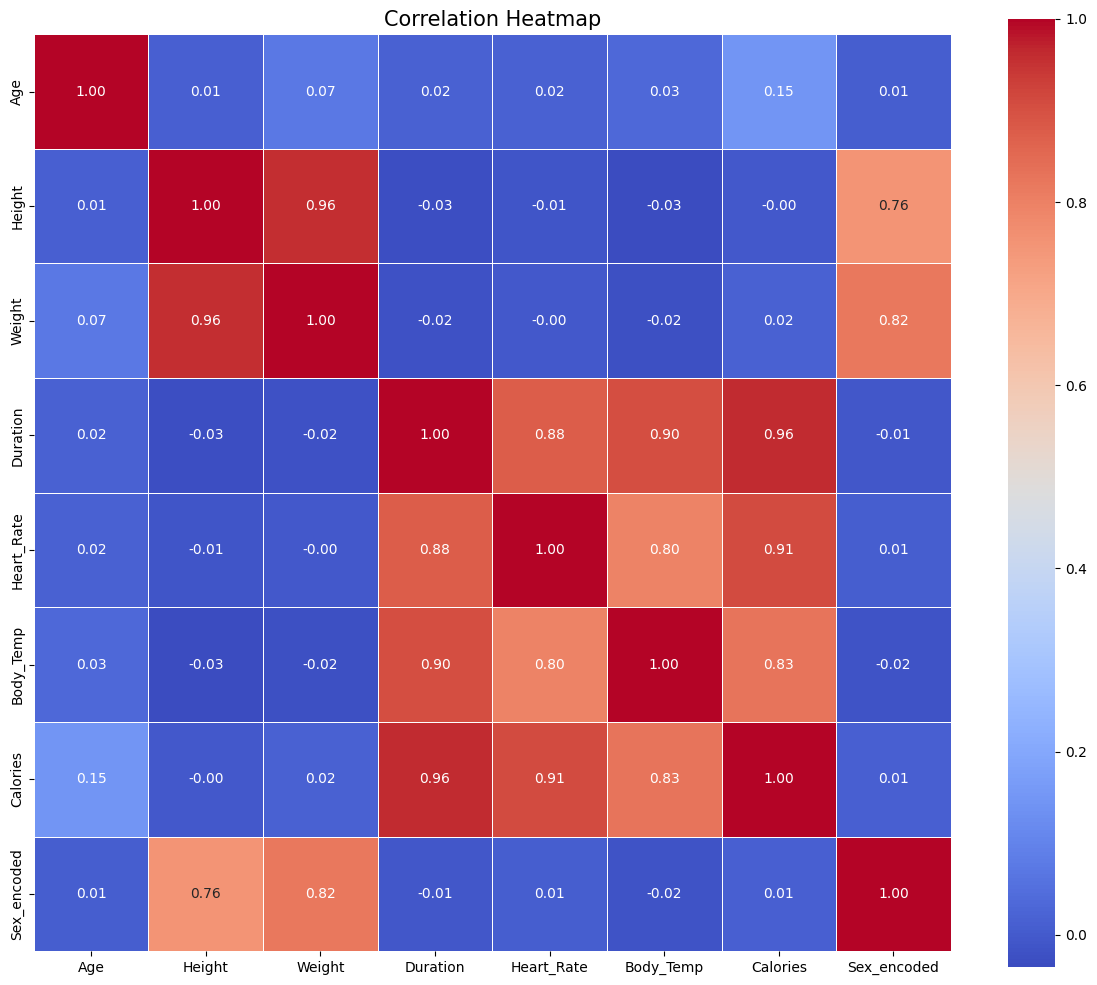

In [32]:
correlation = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.tight_layout()
plt.show()